In [ ]:
# Step 1: Import required libraries
import pandas as pd

# Step 2: Load the dataset (tab-separated file)
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Step 3: Basic info
print("Shape of dataset:", df.shape)
df.head()


In [2]:
import pandas as pd
df = pd.read_csv('marketing_campaign.csv', sep='\t')
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# Check for missing values
df.isnull().sum()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
# Check for duplicate rows
df.duplicated().sum()


np.int64(0)

In [5]:
# Drop rows with missing values
df.dropna(inplace=True)

# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)

# Confirm changes
print("Shape after cleaning:", df.shape)


Shape after cleaning: (2216, 29)


In [6]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


ValueError: time data "21-08-2013" doesn't match format "%m-%d-%Y", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [7]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')


In [8]:
df['Dt_Customer'].isnull().sum()


np.int64(1311)

In [9]:
df.dropna(subset=['Dt_Customer'], inplace=True)


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Matplotlib is building the font cache; this may take a moment.


KeyError: 'Age'

<Figure size 800x500 with 0 Axes>

In [11]:
df.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [12]:
df.columns = df.columns.str.strip()


<Axes: xlabel='Income', ylabel='Count'>

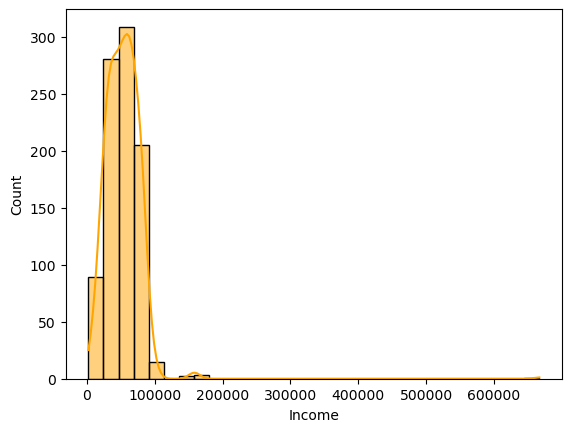

In [13]:
sns.histplot(df['Income'], kde=True, bins=30, color='orange')


In [14]:
# Selecting relevant features
features = df[['Age', 'Income', 'Total_Spent']].copy()

# Drop rows with missing income (if any slipped in)
features.dropna(inplace=True)


KeyError: "['Age', 'Total_Spent'] not in index"

In [15]:
# Create Age column (if not already created)
df['Age'] = 2025 - df['Year_Birth']

# Create Total_Spent column
df['Total_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)



In [16]:
df.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Spent'],
      dtype='object')

In [17]:
features = df[['Age', 'Income', 'Total_Spent']].copy()
features.dropna(inplace=True)


In [18]:
features = df[['Age', 'Income', 'Total_Spent']].copy()
features.dropna(inplace=True)


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


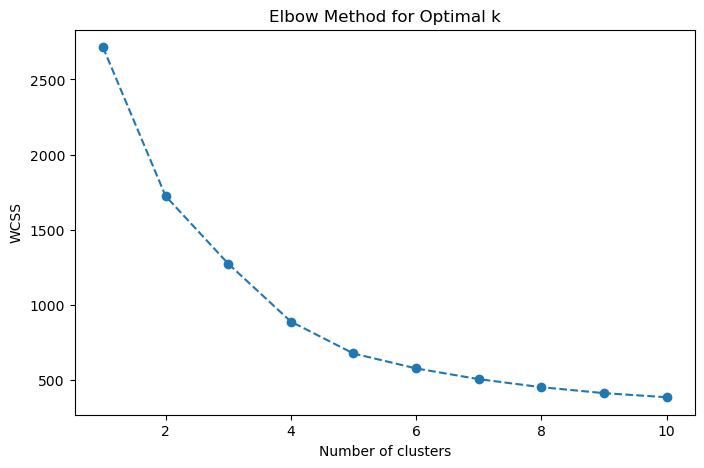

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [21]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


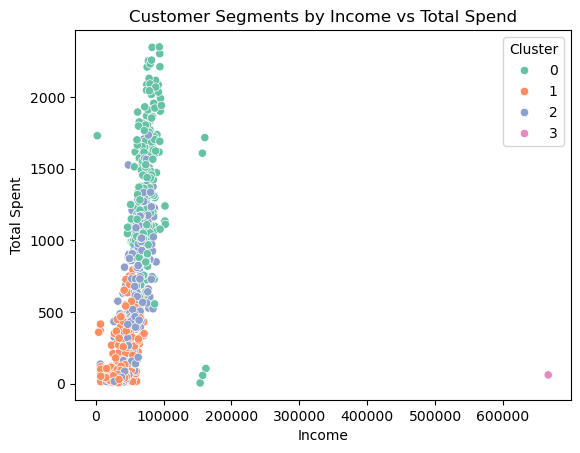

In [22]:
import seaborn as sns

sns.scatterplot(x=features['Income'], y=features['Total_Spent'], hue=df['Cluster'], palette='Set2')
plt.title('Customer Segments by Income vs Total Spend')
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.show()


Business Insights from Clustering
Cluster 0: High-income and high-spending customers → ideal for premium marketing

Cluster 1: Low-income but high-spending → possibly credit buyers or loyal buyers

Cluster 2: High-income but low-spending → target with exclusive offers

Cluster 3: Low-income and low-spending → least responsive to campaigns

These insights help companies:

Tailor campaigns by customer type

Reduce wasted marketing spend

Focus on high-return customer segments
